In [ ]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
from tqdm import tqdm
import random
import os
import numpy as np
import pandas as pd
import glob
import re
import seaborn as sns
import unicodedata
import matplotlib
import matplotlib.pyplot as plt
#import koreanize_matplotlib
import matplotlib.font_manager as fm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(69)

In [ ]:
# %cd /content/gdrive/MyDrive/sound
# !unzip "sound.zip"
# %cd /content

In [ ]:
path = '/content/gdrive/MyDrive/sound/open'
train = pd.read_csv(f'{path}/train.csv')
test = pd.read_csv(f'{path}/test.csv')
ans = f'{path}/sample_submission.csv'
submit = pd.read_csv(ans)

In [ ]:
train.head()

,id,path,label
0,TRAIN_0000,./train/TRAIN_0000.wav,1
1,TRAIN_0001,./train/TRAIN_0001.wav,2
2,TRAIN_0002,./train/TRAIN_0002.wav,4
3,TRAIN_0003,./train/TRAIN_0003.wav,5
4,TRAIN_0004,./train/TRAIN_0004.wav,4


In [ ]:
train['label'].value_counts()

0    867
2    859
5    853
3    852
1    848
4    722
Name: label, dtype: int64

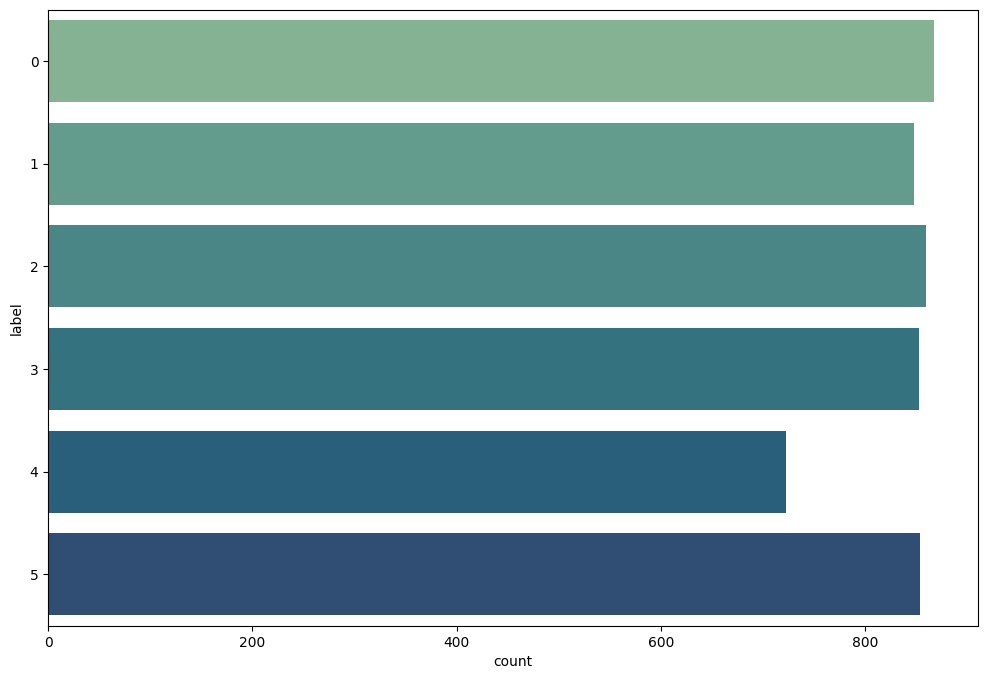

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=train, y='label',  palette='crest', dodge=False)
plt.show()

In [ ]:
audio_len = []

for i in tqdm(train.id):
    y, s = librosa.load(f'{path}/train/{i}.wav')
    audio_len.append(len(y)/s)

100%|██████████| 5001/5001 [15:26<00:00,  5.40it/s]


In [ ]:
audio_len[:10]

[2.3690249433106576,
 2.6026303854875286,
 2.902902494331066,
 2.3023129251700682,
 1.8685714285714285,
 2.5025396825396826,
 2.06875283446712,
 2.3023129251700682,
 2.6026303854875286,
 2.2022222222222223]

<ipython-input-11-007ee571ad92>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(audio_len)


<Axes: title={'center': 'Length of audio'}, ylabel='Density'>

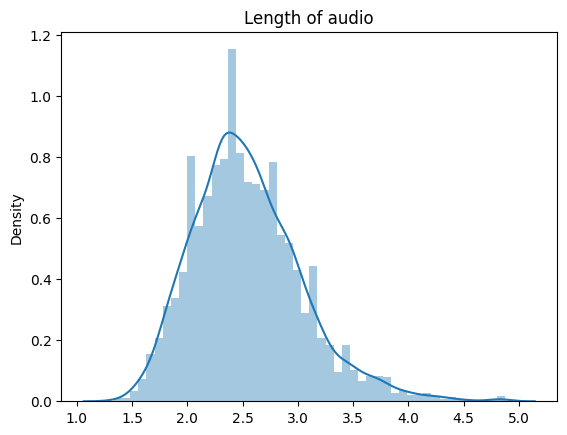

In [ ]:
plt.title("Length of audio")
sns.distplot(audio_len)

In [ ]:
def load_sound(name):
    y, s = librosa.load(f'{path}/train/{name}.wav')
    audio, _ = librosa.effects.trim(y)

    plt.figure(figsize = (16, 6))
    librosa.display.waveshow(y = audio, sr = s, color = "#00008B")
    plt.title("Sound Waves Examples")

In [ ]:
random_sample = random.sample(train['id'].to_list(), 10)

In [ ]:
random_sample

['TRAIN_0305',
 'TRAIN_0785',
 'TRAIN_1367',
 'TRAIN_0546',
 'TRAIN_4957',
 'TRAIN_2823',
 'TRAIN_2687',
 'TRAIN_4499',
 'TRAIN_3395',
 'TRAIN_3807']

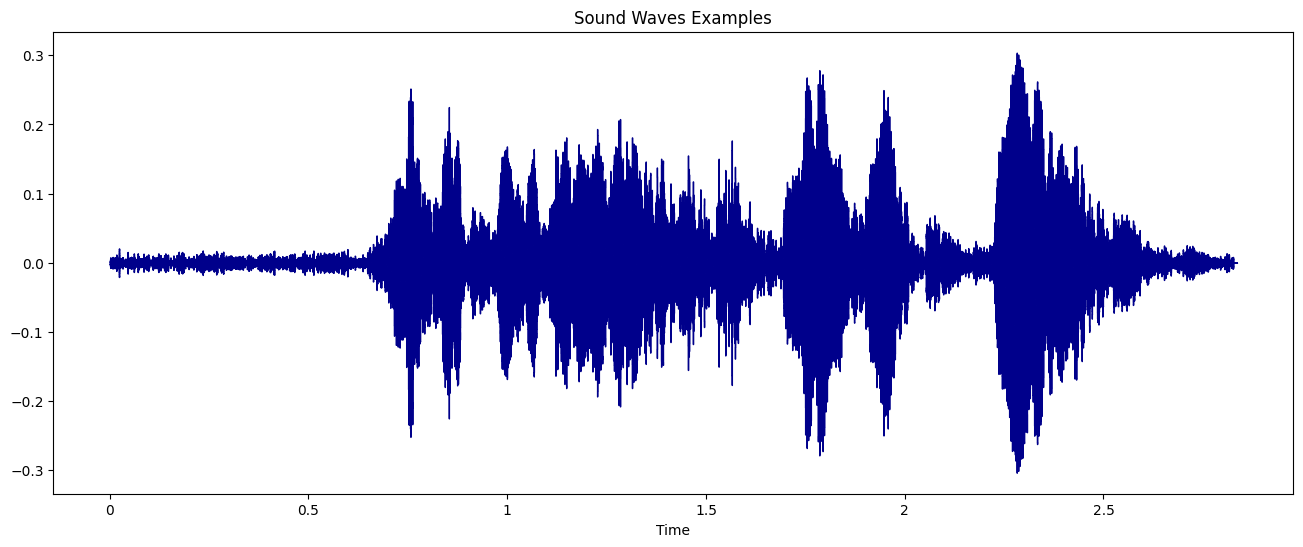

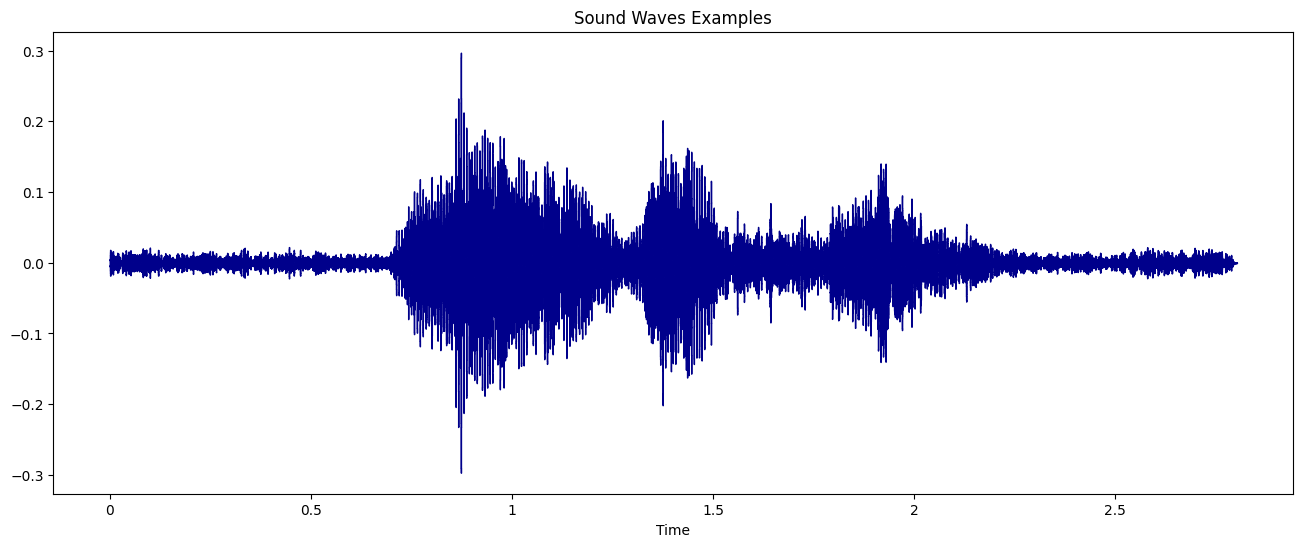

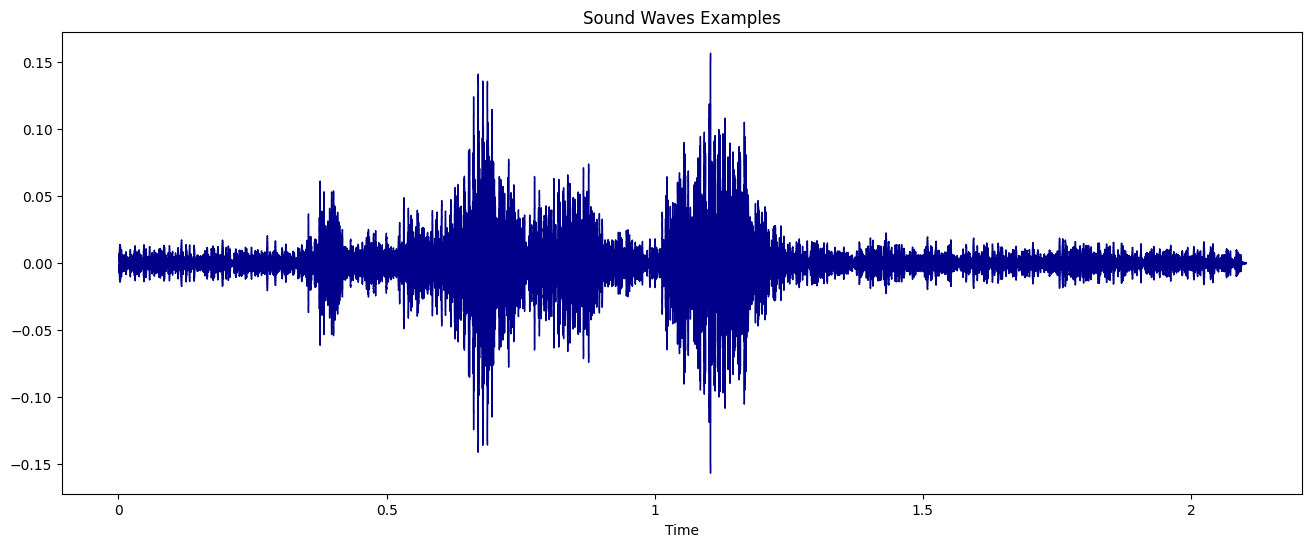

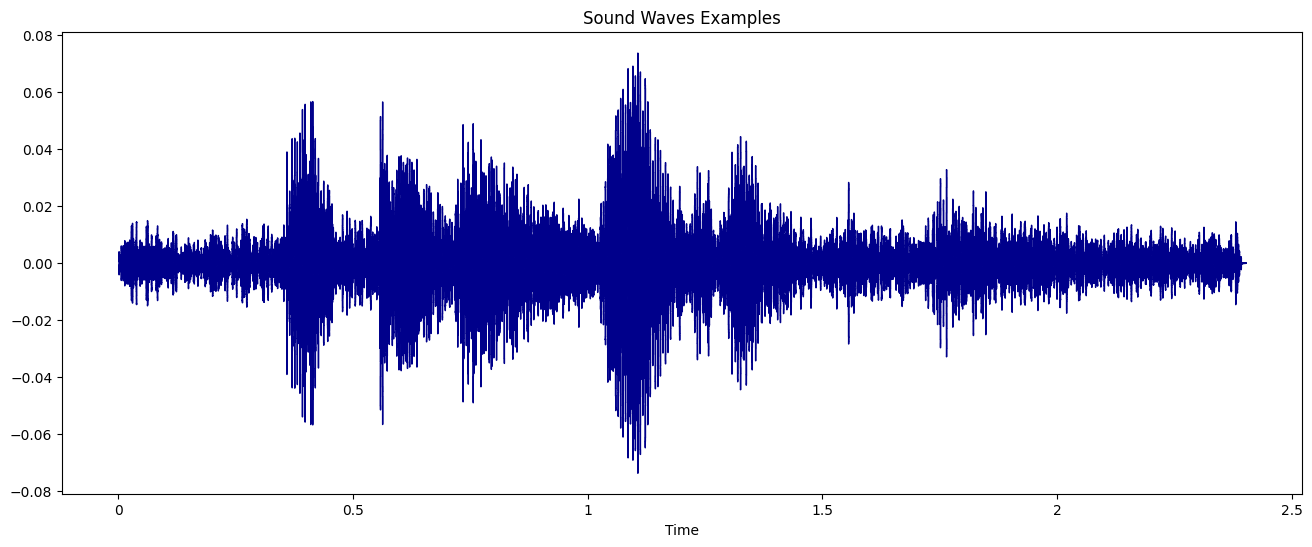

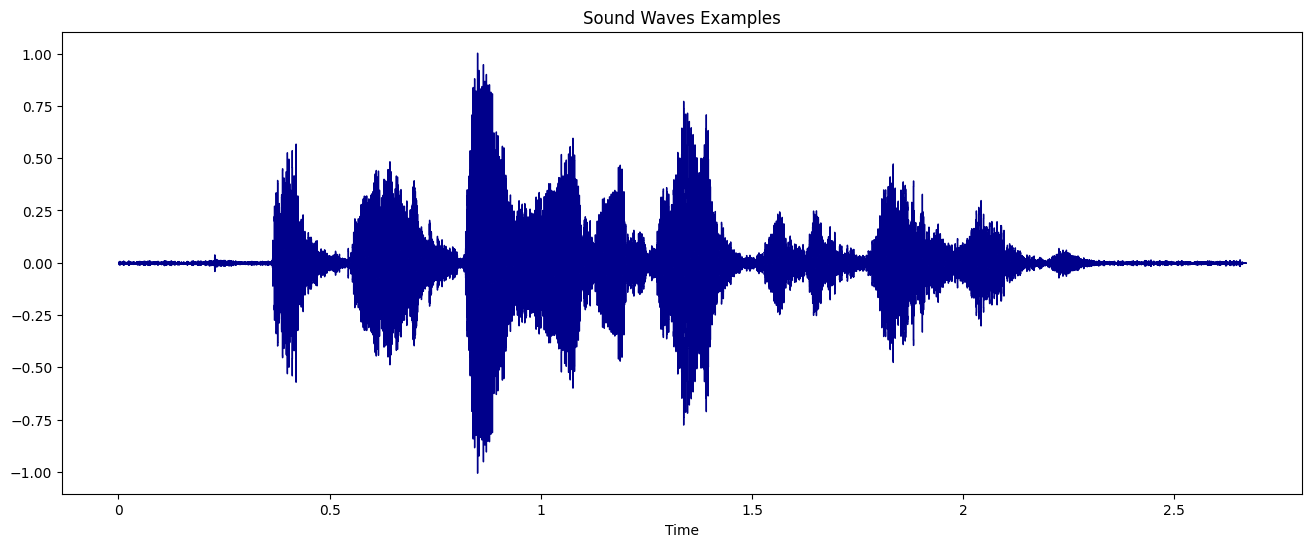

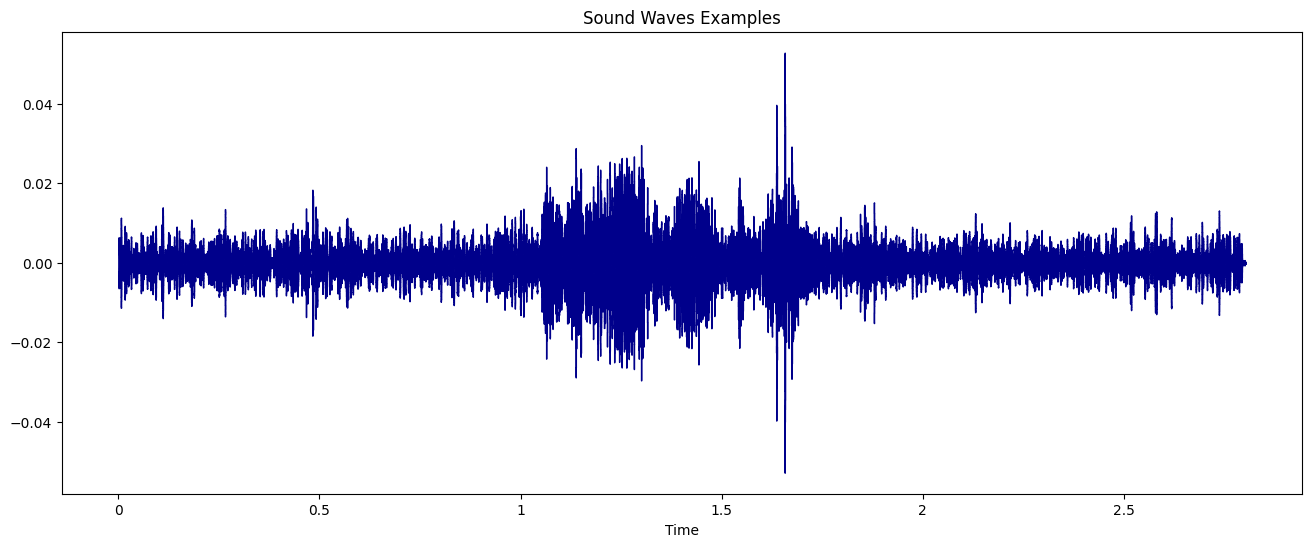

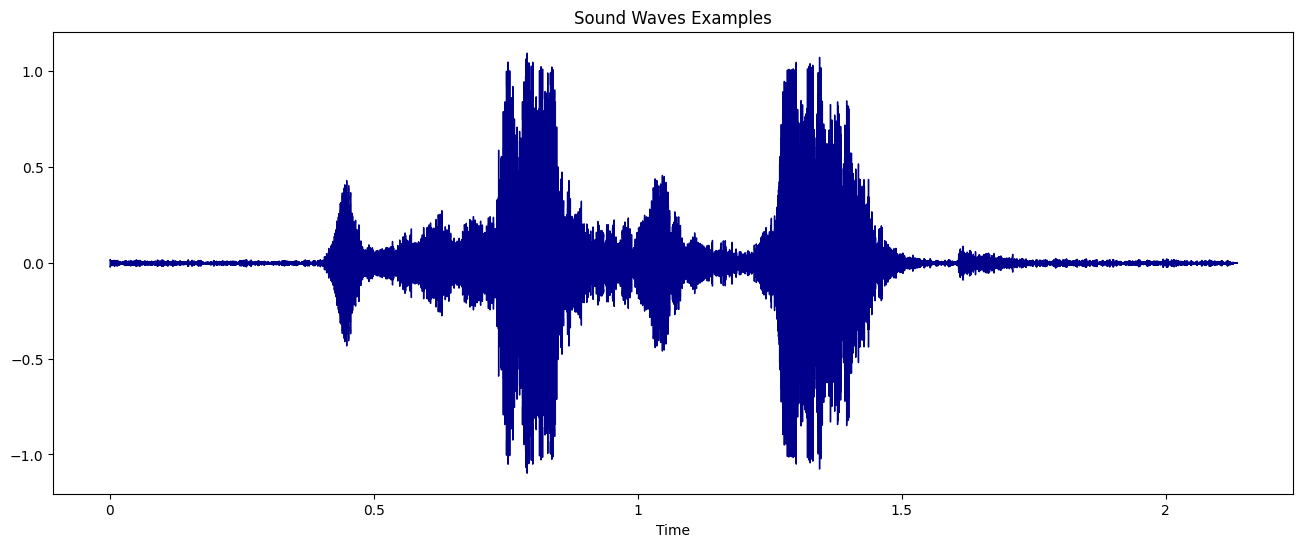

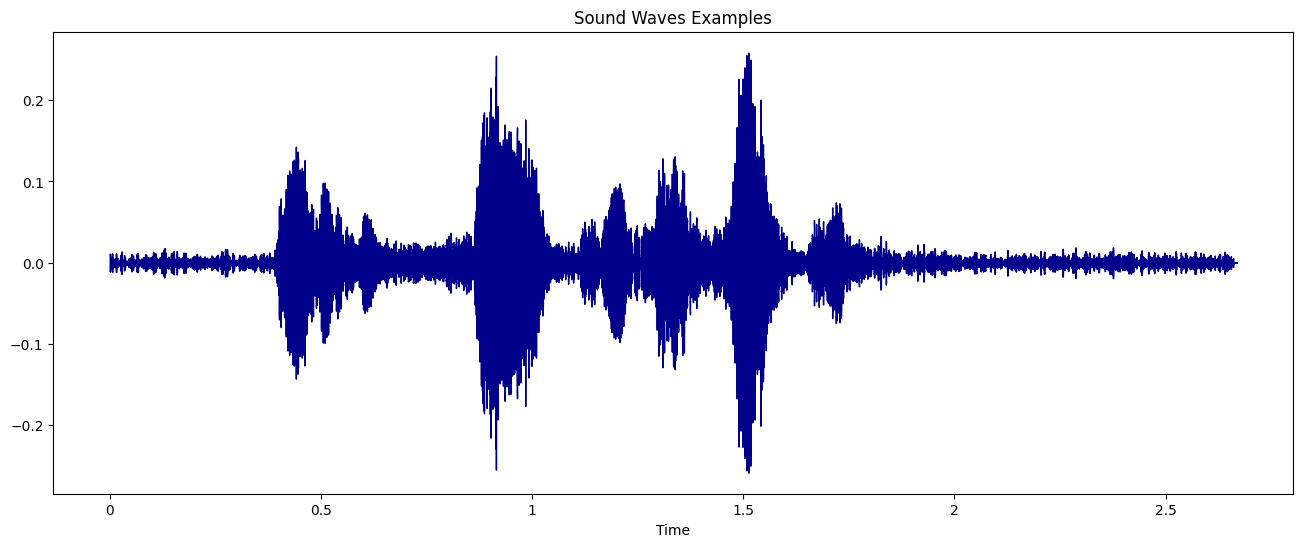

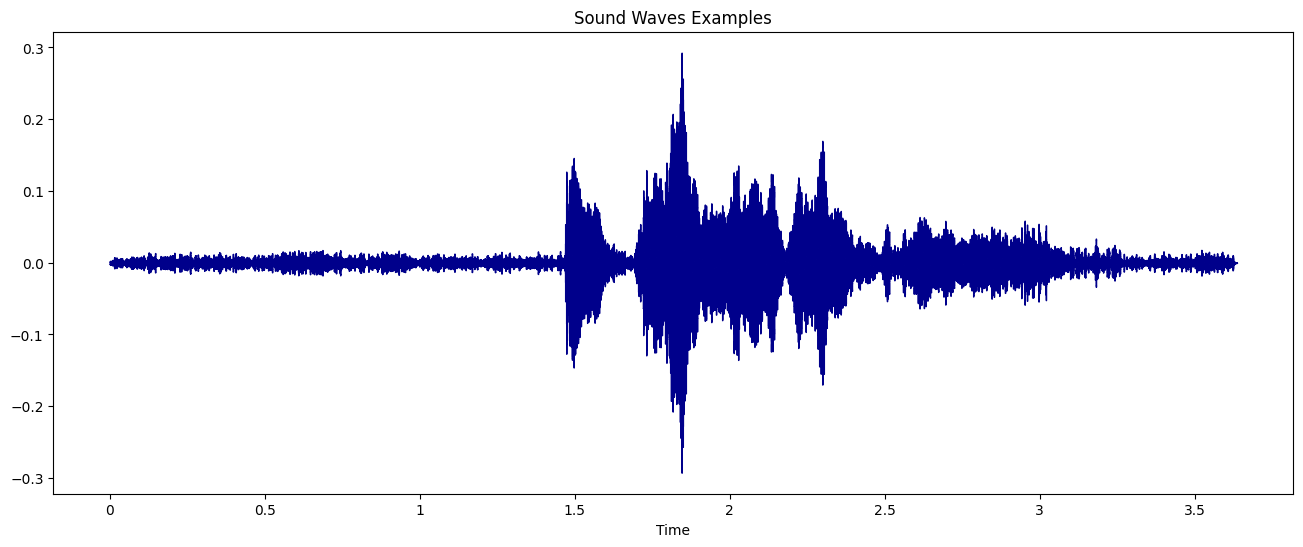

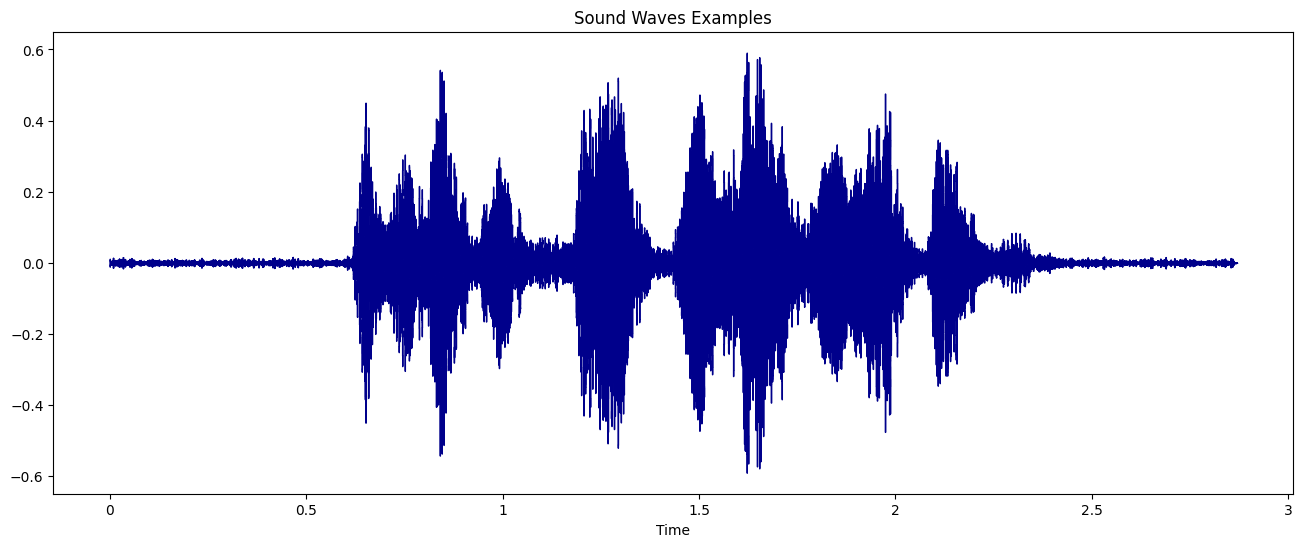

In [ ]:
for id in (random_sample):
    load_sound(id)

In [ ]:
def load_sound_FFT(name):
    y, s = librosa.load(f'{path}/train/{name}.wav')
    audio, _ = librosa.effects.trim(y)
    fft = 2048
    hl = 512
    stft = np.abs(librosa.stft(audio, n_fft = fft, hop_length = hl))
    plt.figure(figsize = (16, 8))
    plt.title("FFT of recording", fontsize = 23);
    plt.plot(stft);

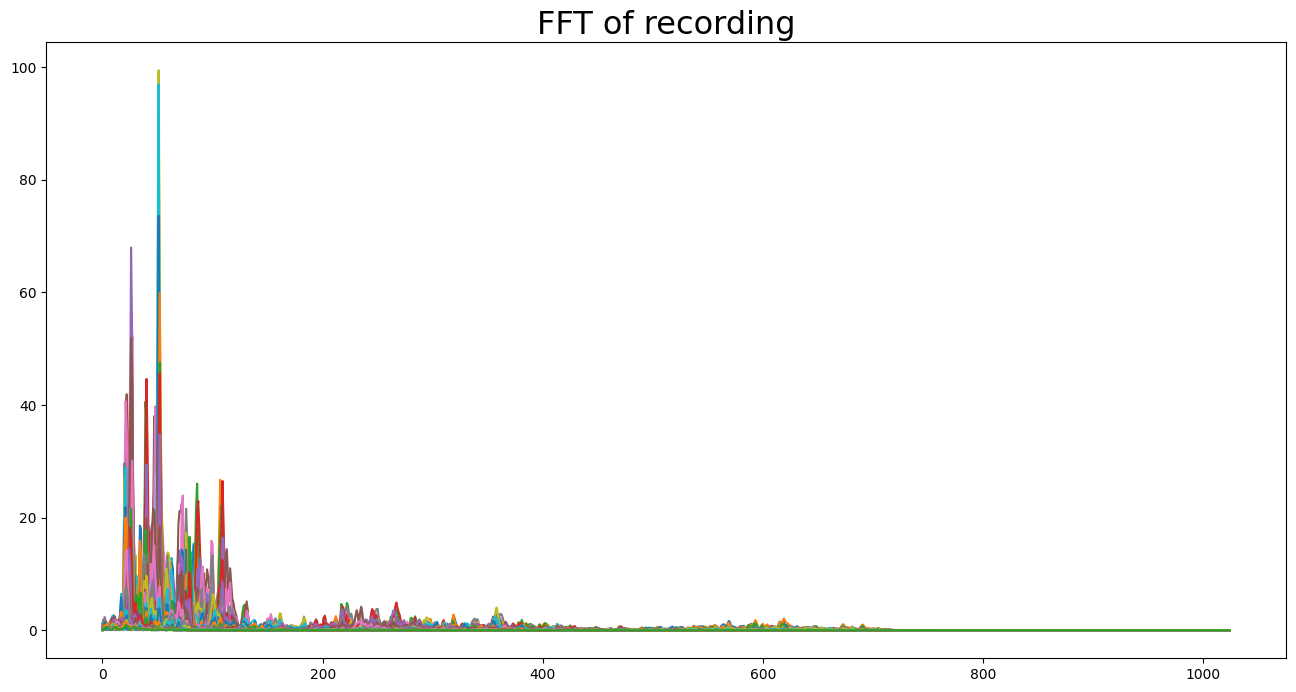

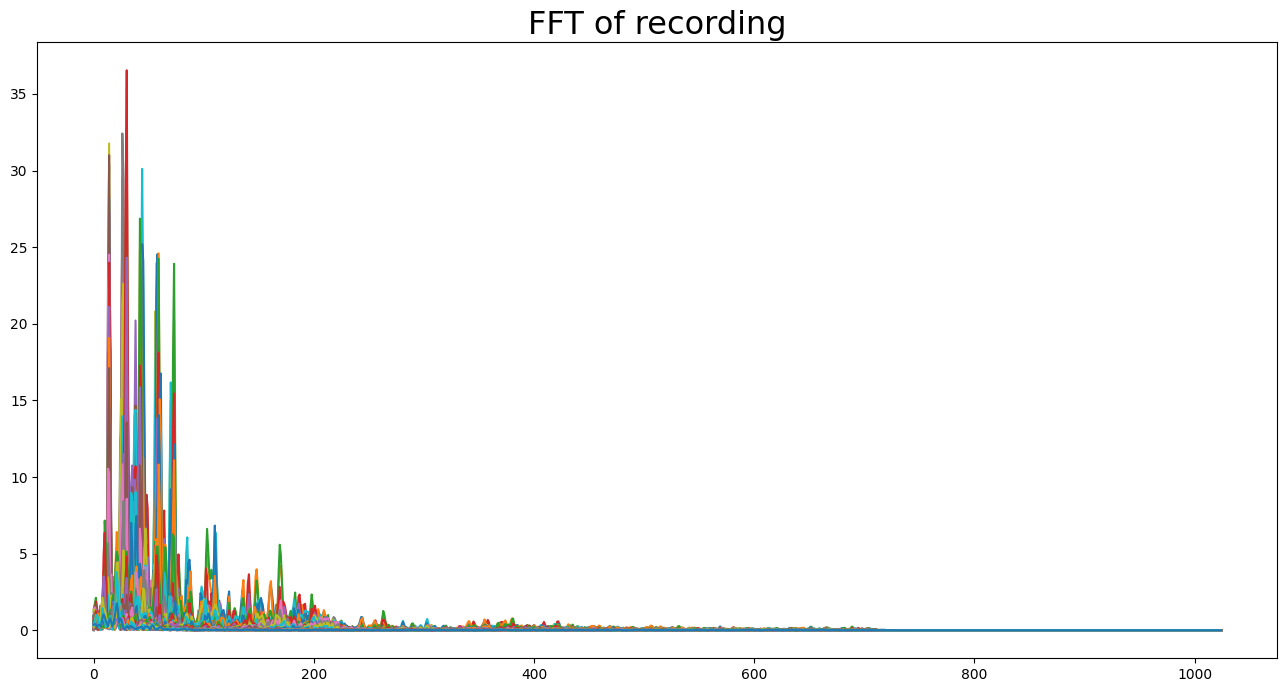

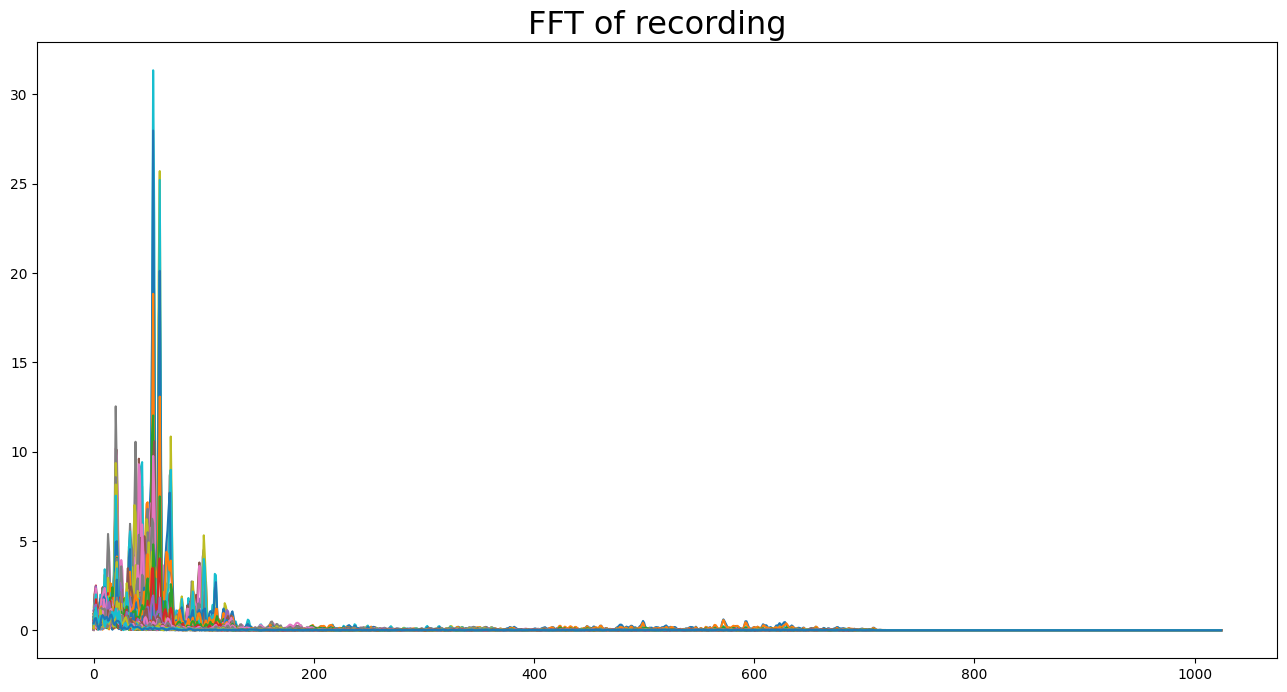

In [ ]:
for id in (random_sample[:3]):
    load_sound_FFT(id)

In [ ]:
#Mel Spectrogram
def Mel_Spectrogram(num = 0, frame_length = 0.025, frame_stride = 0.010):
    sample = os.listdir(f'{path}/train')
    temp = train[train.label == num].id
    file_name = temp[temp.index[0]]
    
    file = f'{path}/train/{file_name}.wav'
    data,sample_rate = librosa.load(file, sr = 16000)
    
    input_nfft = int(round(sample_rate*frame_length))
    input_stride = int(round(sample_rate*frame_stride))
    
    S = librosa.feature.melspectrogram(y=data, n_mels=100, n_fft=input_nfft, hop_length=input_stride)
    
    print("Wav length: {}, Mel_S shape:{}".format(len(data)/sample_rate, np.shape(S)))
    
    S_dB  = librosa.power_to_db(S, ref=np.max)
    fig = plt.figure(figsize = (14,5))
    librosa.display.specshow(S_dB, 
                             sr=sample_rate, 
                             hop_length=input_stride,
                             x_axis='time',
                             y_axis='log')
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel spectrogram of audio label {num}")
    plt.show()

In [ ]:
# 0: angry
# 1: fear
# 2: sad
# 3: disgust
# 4: neutral

Wav length: 2.06875, Mel_S shape:(100, 207)


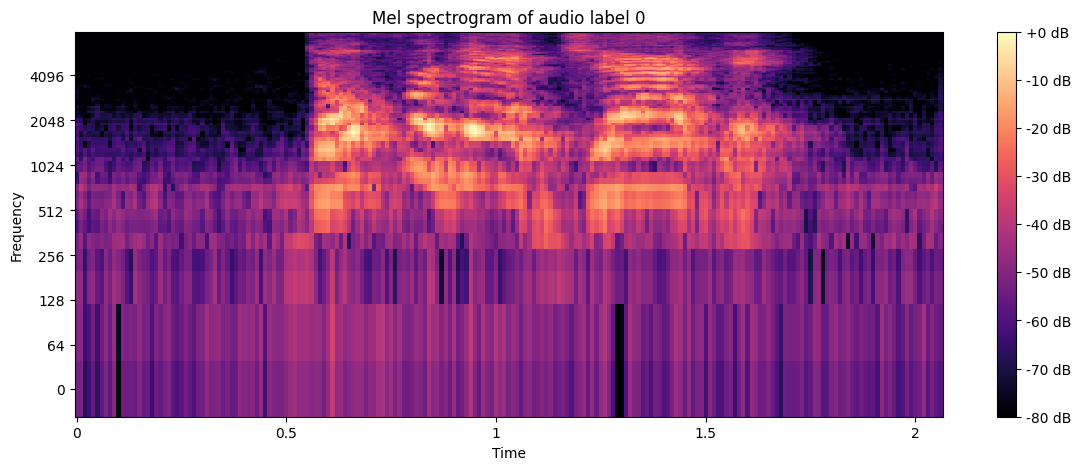

Wav length: 2.369, Mel_S shape:(100, 237)


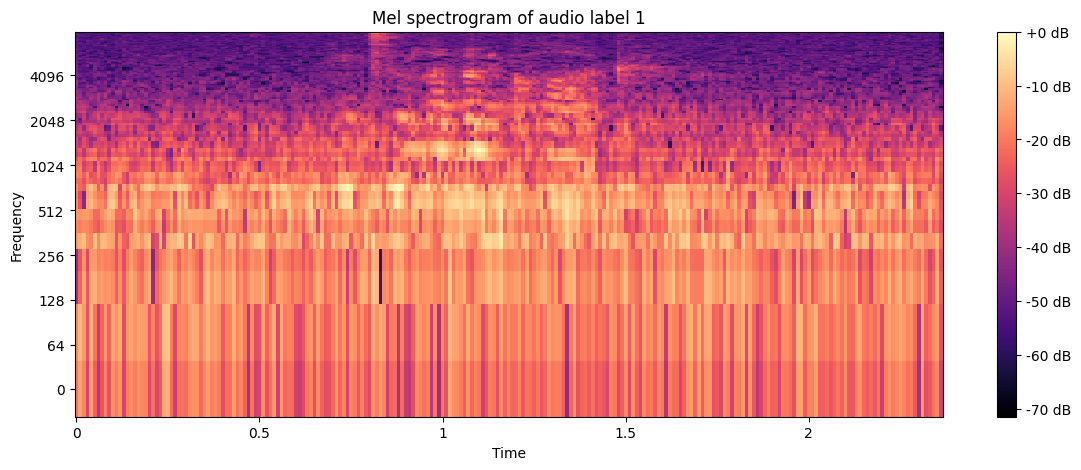

Wav length: 2.602625, Mel_S shape:(100, 261)


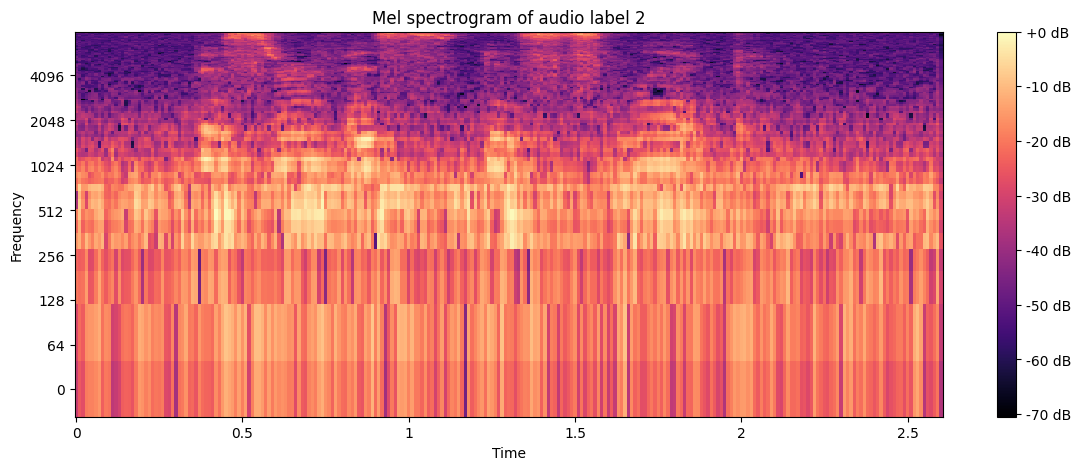

Wav length: 2.5025, Mel_S shape:(100, 251)


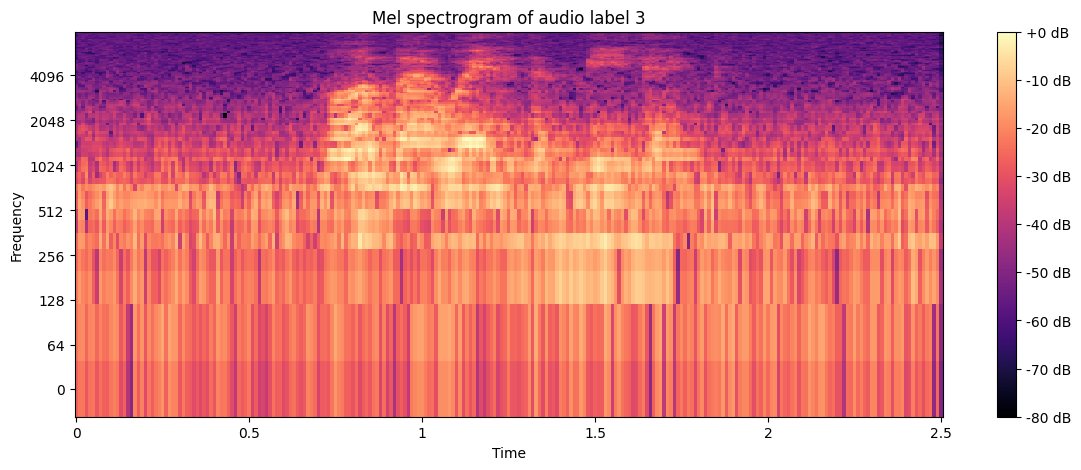

Wav length: 2.902875, Mel_S shape:(100, 291)


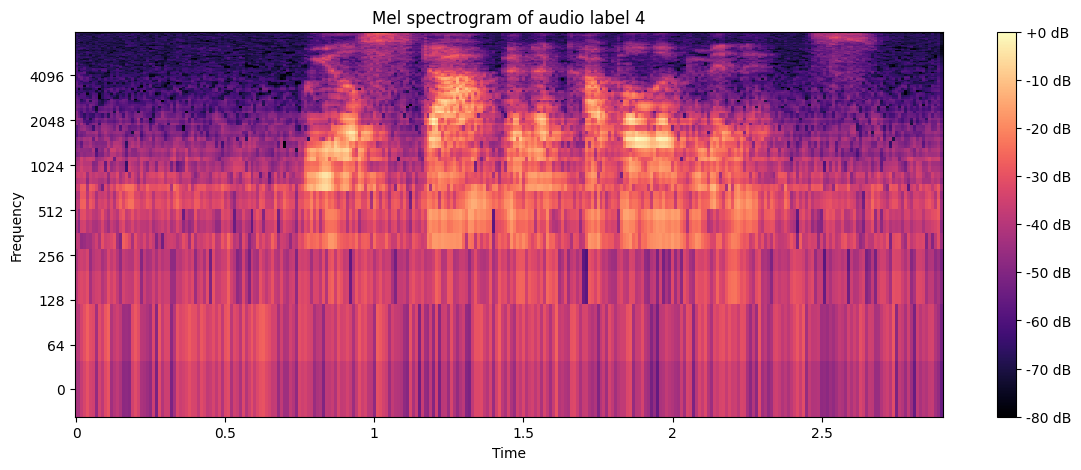

In [ ]:
for i in range(0,5):
    Mel_Spectrogram(i)